<h3> <font color= 'Orange'>Name: </font> <b> BALOGUN-SALIU MUJEED TOLUWANIKE</b>  </h3>
<h3> <font color= 'Orange'>Matric no: </font> <b>20182872</b> </h3>

#  Cassava Disease Detection using CNNs

In this notebook, we make use of the Cassava Disease Dataset from
https://www.kaggle.com/competitions/cassava-disease/data

We are using a CNN model architecture (MobileNetV2) to classify across different classes of cassava leaf diseases.We also include healthy ones in our classification.
<hr>

**NB** : our dataset , which is the 'train.zip' folder  has to be in the same directory as our code


## Imports and setup

Here, the 'train.zip' file is being sourced for directly using 'wget'



In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kagglesdsdata/competitions/13277/422313/train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1699092282&Signature=afKeyXlGodOnBVpuL4SbOwVqLEoECPgUsYnukm88qO%2FxB%2BvxpNX7K%2BzpYyawwbR8X%2BeFL8Epm1YOkti%2Fyh%2FnBlFK1Y%2B0xU7BMgpsWfDj5LwCC2xfgg1RITh5FXbK0HfyMGOeTWiR0reOaPQIXBUk9SRxehTvQKz0%2BbEDwYHfWp55h3eqgot7A5s2%2BDAES0HVoIe3ctqWn4J2eUCHOnhRHj44tAOBp9%2FNLV0ZOzSyHYLg0hG18hU01TVEn5w5qz7lLYVUWDHpwE25wfxfvJNQoSGBhgcTk7nFSxn%2BYIdcojClRbz%2ByU5T5i00DJ%2Ba4qGSYjc%2Bs6qVkNDpiyVLz806YQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.zip" -c -O 'train.zip'


--2023-11-01 10:05:16--  https://storage.googleapis.com/kagglesdsdata/competitions/13277/422313/train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1699092282&Signature=afKeyXlGodOnBVpuL4SbOwVqLEoECPgUsYnukm88qO%2FxB%2BvxpNX7K%2BzpYyawwbR8X%2BeFL8Epm1YOkti%2Fyh%2FnBlFK1Y%2B0xU7BMgpsWfDj5LwCC2xfgg1RITh5FXbK0HfyMGOeTWiR0reOaPQIXBUk9SRxehTvQKz0%2BbEDwYHfWp55h3eqgot7A5s2%2BDAES0HVoIe3ctqWn4J2eUCHOnhRHj44tAOBp9%2FNLV0ZOzSyHYLg0hG18hU01TVEn5w5qz7lLYVUWDHpwE25wfxfvJNQoSGBhgcTk7nFSxn%2BYIdcojClRbz%2ByU5T5i00DJ%2Ba4qGSYjc%2Bs6qVkNDpiyVLz806YQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 814615952 (777M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===============

In [ ]:
!unzip train.zip
!pip install split-folders[full] -q

Streaming output truncated to the last 5000 lines.
  inflating: train/cgm/train-cgm-519.jpg  
  inflating: train/cgm/train-cgm-727.jpg  
  inflating: train/cgm/train-cgm-733.jpg  
  inflating: train/cgm/train-cgm-737.jpg  
  inflating: train/cgm/train-cgm-723.jpg  
  inflating: train/cgm/train-cgm-535.jpg  
  inflating: train/cgm/train-cgm-253.jpg  
  inflating: train/cgm/train-cgm-247.jpg  
  inflating: train/cgm/train-cgm-521.jpg  
  inflating: train/cgm/train-cgm-509.jpg  
  inflating: train/cgm/train-cgm-290.jpg  
  inflating: train/cgm/train-cgm-284.jpg  
  inflating: train/cgm/train-cgm-441.jpg  
  inflating: train/cgm/train-cgm-327.jpg  
  inflating: train/cgm/train-cgm-333.jpg  
  inflating: train/cgm/train-cgm-455.jpg  
  inflating: train/cgm/train-cgm-469.jpg  
  inflating: train/cgm/train-cgm-0.jpg  
  inflating: train/cgm/train-cgm-482.jpg  
  inflating: train/cgm/train-cgm-496.jpg  
  inflating: train/cgm/train-cgm-125.jpg  
  inflating: train/cgm/train-cgm-75.jpg  
  infl

In [ ]:
labels = ['cgm','cmd','healthy','cbb','cbsd']

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense,Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

import os
from PIL import Image
import seaborn as sns

name_map = dict(
    cbb='Bacterial Blight',
    cbsd='Brown Streak Disease',
    cgm='Green Mite',
    cmd='Mosaic Disease',
    healthy='Healthy')

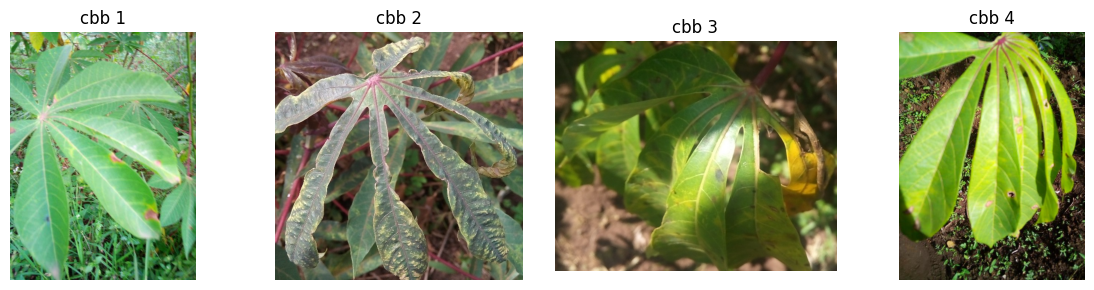

In [ ]:

# VISUALIZING FOR CBB IMAGES
folder_path = 'train/cbb/'

image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
num_images_to_display = 4

fig, axes = plt.subplots(1, num_images_to_display, figsize=(12, 3))

for i, image_file in enumerate(image_files[:num_images_to_display]):
    image_path = os.path.join(folder_path, image_file)
    img = Image.open(image_path)

    axes[i].imshow(img)
    axes[i].set_title(f"cbb {i+1}")
    axes[i].axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()


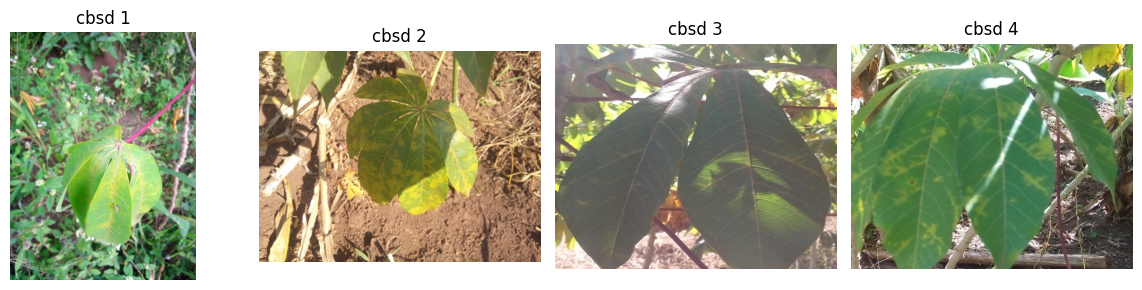

In [ ]:

# VISUALIZING FOR cbsd IMAGES
folder_path = 'train/cbsd/'

image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
num_images_to_display = 4


fig, axes = plt.subplots(1, num_images_to_display, figsize=(12, 3))

for i, image_file in enumerate(image_files[:num_images_to_display]):
    image_path = os.path.join(folder_path, image_file)
    img = Image.open(image_path)

    axes[i].imshow(img)
    axes[i].set_title(f"cbsd {i+1}")
    axes[i].axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()

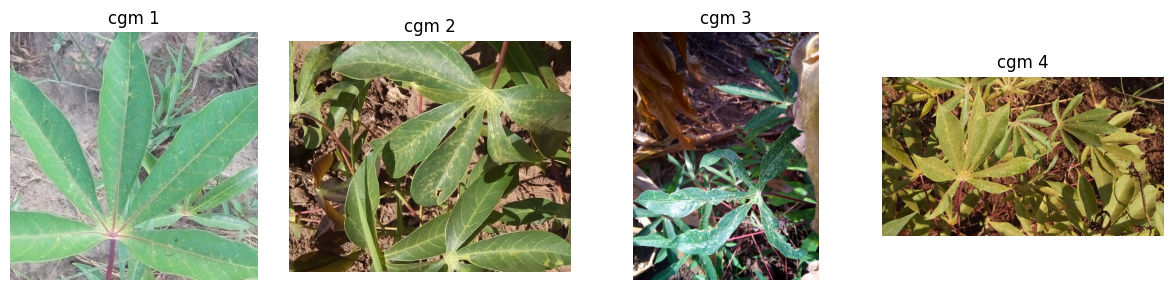

In [ ]:

# VISUALIZING FOR cgm IMAGES
folder_path = 'train/cgm/'

image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
num_images_to_display = 4


fig, axes = plt.subplots(1, num_images_to_display, figsize=(12, 3))

for i, image_file in enumerate(image_files[:num_images_to_display]):
    image_path = os.path.join(folder_path, image_file)
    img = Image.open(image_path)

    axes[i].imshow(img)
    axes[i].set_title(f"cgm {i+1}")
    axes[i].axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()

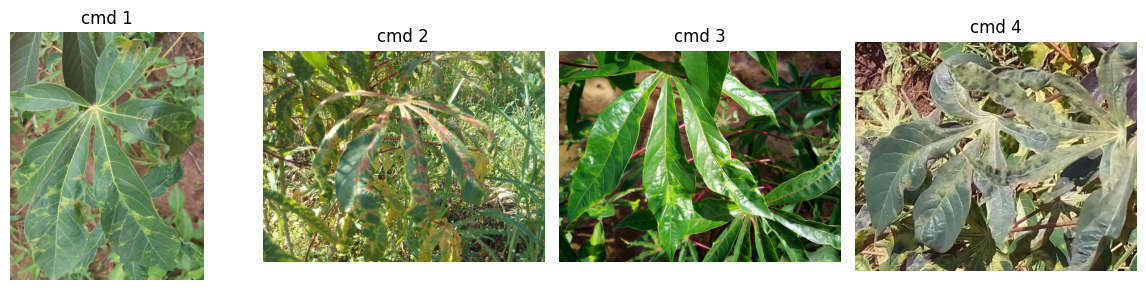

In [ ]:
# VISUALIZING FOR cmd IMAGES
folder_path = 'train/cmd/'

image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
num_images_to_display = 4


fig, axes = plt.subplots(1, num_images_to_display, figsize=(12, 3))

for i, image_file in enumerate(image_files[:num_images_to_display]):
    image_path = os.path.join(folder_path, image_file)
    img = Image.open(image_path)

    axes[i].imshow(img)
    axes[i].set_title(f"cmd {i+1}")
    axes[i].axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()

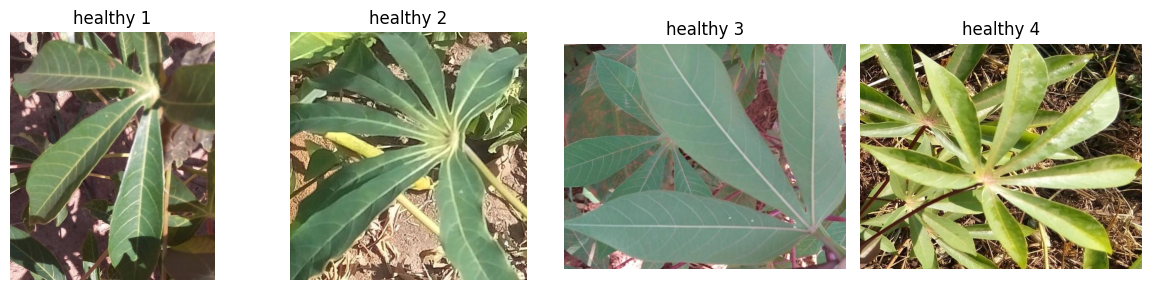

In [ ]:
# VISUALIZING FOR healthy IMAGES
folder_path = 'train/healthy/'

image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
num_images_to_display = 4


fig, axes = plt.subplots(1, num_images_to_display, figsize=(12, 3))

for i, image_file in enumerate(image_files[:num_images_to_display]):
    image_path = os.path.join(folder_path, image_file)
    img = Image.open(image_path)

    axes[i].imshow(img)
    axes[i].set_title(f"healthy {i+1}")
    axes[i].axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()

In [ ]:
print("No of samples of cbb: ", len(os.listdir('train/cbb')))
print("No of samples of cbsd: ",len(os.listdir('train/cbsd')))
print("No of samples of cgm: ",len(os.listdir('train/cgm')))
print("No of samples of cmd: ",len(os.listdir('train/cmd')))
print("No of samples of healthy: ",len(os.listdir('train/healthy')))

No of samples of cbb:  466
No of samples of cbsd:  1443
No of samples of cgm:  773
No of samples of cmd:  2658
No of samples of healthy:  316


# Data Preprocessing

Splitting data into training (80%) and Validation (20%)

In [ ]:
import splitfolders

splitfolders.ratio("/content/train", output="output",
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False)

Copying files: 5656 files [00:03, 1650.88 files/s]


In [ ]:
batch_size = 32

datagen = image.ImageDataGenerator(preprocessing_function=preprocess_input, # this function normalizes the input images

                                   # Adding data augmentations
                                   zoom_range = .2 ,
                                   shear_range = .2,
                                   rotation_range = 45,
                                   horizontal_flip = True
                                   )

# Define the paths to your train and validation data directories
train_data_dir = '/content/output/train'
validation_data_dir = '/content/output/val'

train_generator = datagen.flow_from_directory(train_data_dir,
	class_mode='categorical', batch_size=batch_size, target_size=(224,224), shuffle = True)
validation_generator = datagen.flow_from_directory(validation_data_dir,
	class_mode='categorical', batch_size=batch_size, target_size=(224,224), shuffle = False)

Found 4522 images belonging to 5 classes.
Found 1134 images belonging to 5 classes.


# Model Training

Here, we will be making use of a pretrained model to make training faster and also improve the model's performance


In [ ]:
pretrained = MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
    pooling='max',
)

pretrained.trainable = False

model = Sequential()
model.add(pretrained)
model.add(Flatten()) # flatten the conv2d
model.add(Dense(128, activation = 'relu')) # fully connected layer
model.add(Dropout(0.2)) # dropout layer to reduce overfitting
model.add(Dense(5, activation = 'softmax')) # output layer

model.summary()

9406464/9406464 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 2422597 (9.24 MB)
Trainable params: 164613 (6

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
model.compile(optimizer = 'adam',
                     loss = 'categorical_crossentropy',
                     metrics = ['accuracy'])


# Here's a callback for saving the best model
checkpoint_callback = ModelCheckpoint(
    filepath='best_model.h5',  # Specify the file path to save the best model
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [ ]:
epochs = 15
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = epochs,
                    steps_per_epoch = len(train_generator),
                    validation_steps = len(validation_generator),
                    callbacks = [checkpoint_callback]
                    )

Epoch 1/15
142/142 [==============================] - ETA: 0s - loss: 1.3799 - accuracy: 0.5279
Epoch 1: val_accuracy improved from -inf to 0.63757, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


142/142 [==============================] - 99s 616ms/step - loss: 1.3799 - accuracy: 0.5279 - val_loss: 0.9749 - val_accuracy: 0.6376
Epoch 2/15
142/142 [==============================] - ETA: 0s - loss: 0.9952 - accuracy: 0.6117
Epoch 2: val_accuracy improved from 0.63757 to 0.65608, saving model to best_model.h5
142/142 [==============================] - 81s 571ms/step - loss: 0.9952 - accuracy: 0.6117 - val_loss: 0.9207 - val_accuracy: 0.6561
Epoch 3/15
142/142 [==============================] - ETA: 0s - loss: 0.9248 - accuracy: 0.6378
Epoch 3: val_accuracy improved from 0.65608 to 0.69577, saving model to best_model.h5
142/142 [==============================] - 83s 588ms/step - loss: 0.9248 - accuracy: 0.6378 - val_loss: 0.8648 - val_accuracy: 0.6958
Epoch 4/15
142/142 [==============================] - ETA: 0s - loss: 0.9235 - accuracy: 0.6495
Epoch 4: val_accuracy did not improve from 0.69577
142/142 [==============================] - 82s 582ms/step - loss: 0.9235 - accuracy: 0.

#  Model Evaluation


In [ ]:
from sklearn import metrics

model = tensorflow.keras.models.load_model('best_model.h5')
y_preds = model.predict(validation_generator)
y_true = validation_generator.labels
y_preds = np.argmax(y_preds, axis = 1)
print(y_preds)
print(y_true)

36/36 [==============================] - 17s 457ms/step
[1 2 1 ... 4 4 4]
[0 0 0 ... 4 4 4]


CLASSIFICATION REPORT

In [ ]:
from sklearn.metrics import classification_report
from pprint import pprint
report = metrics.classification_report(y_true, y_preds)

pprint(report)


('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.89      0.09      0.16        94\n'
 '           1       0.69      0.72      0.71       289\n'
 '           2       0.74      0.44      0.55       155\n'
 '           3       0.73      0.95      0.82       532\n'
 '           4       0.77      0.47      0.58        64\n'
 '\n'
 '    accuracy                           0.72      1134\n'
 '   macro avg       0.76      0.53      0.56      1134\n'
 'weighted avg       0.74      0.72      0.69      1134\n')


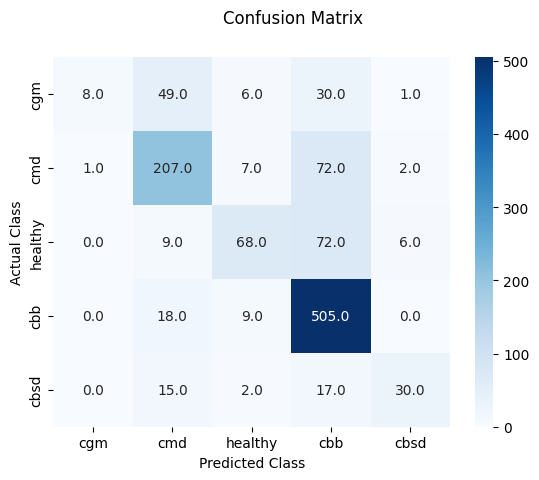

In [ ]:
cm = metrics.confusion_matrix(y_true, y_preds)
labels = ['cgm','cmd','healthy','cbb','cbsd']

sns.heatmap(cm, annot=True, fmt='.1f', cmap='Blues',xticklabels = labels ,yticklabels=labels )
plt.suptitle('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

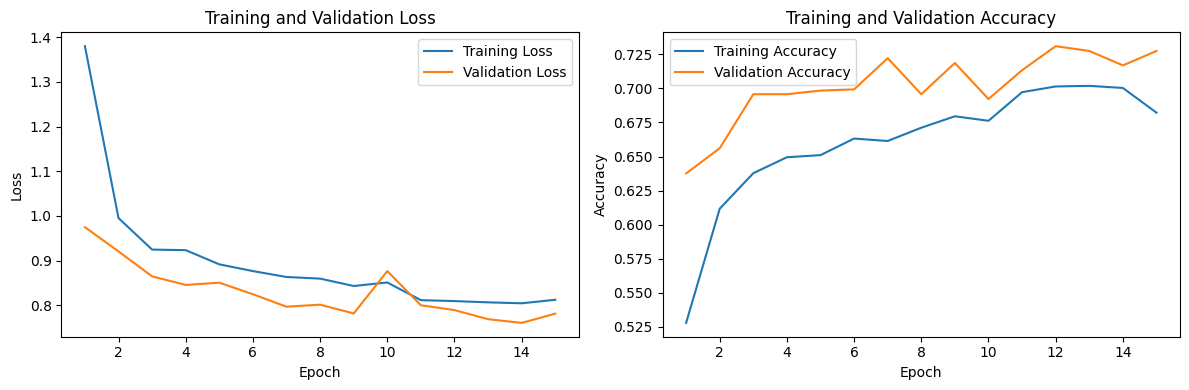

In [ ]:
# Extract training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
# Create subplots for loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training and validation losses
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), training_loss, label='Training Loss')
plt.plot(range(1, epochs + 1), validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracies
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs + 1), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
